In [11]:
%matplotlib inline 
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def SEIRD(y, t, N, β, δ, γ, α, μ):
    S,E, I, R, D = y
    dSdt =-β(t) * S * I / N
    dEdt = β(t) * S * I / N - δ*E
    dIdt = δ * E - (1-α) * γ * I - α * μ * I
    dRdt = (1-α) * γ * I
    dDdt = α * μ * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [13]:
L=200

In [14]:
N  = 1000000

def r0(t):
    return 2.0 if t < L else 0.9

D  = 7.0 # infections lasts four days
γ  = 1.0 / D
δ  = 1.0/ 5.0
α  = 0.2
μ  = 1/9
def β(t):
    return r0(t) *  1 / ( α * 1/μ + (1 - α) * 1/γ)

S0, E0, I0, R0, D0 =  N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [15]:
t = np.linspace(0, 364, 365) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(SEIRD, y0, t, args=(N, β, δ, γ, α, μ))
S, E, I, R, D = ret.T

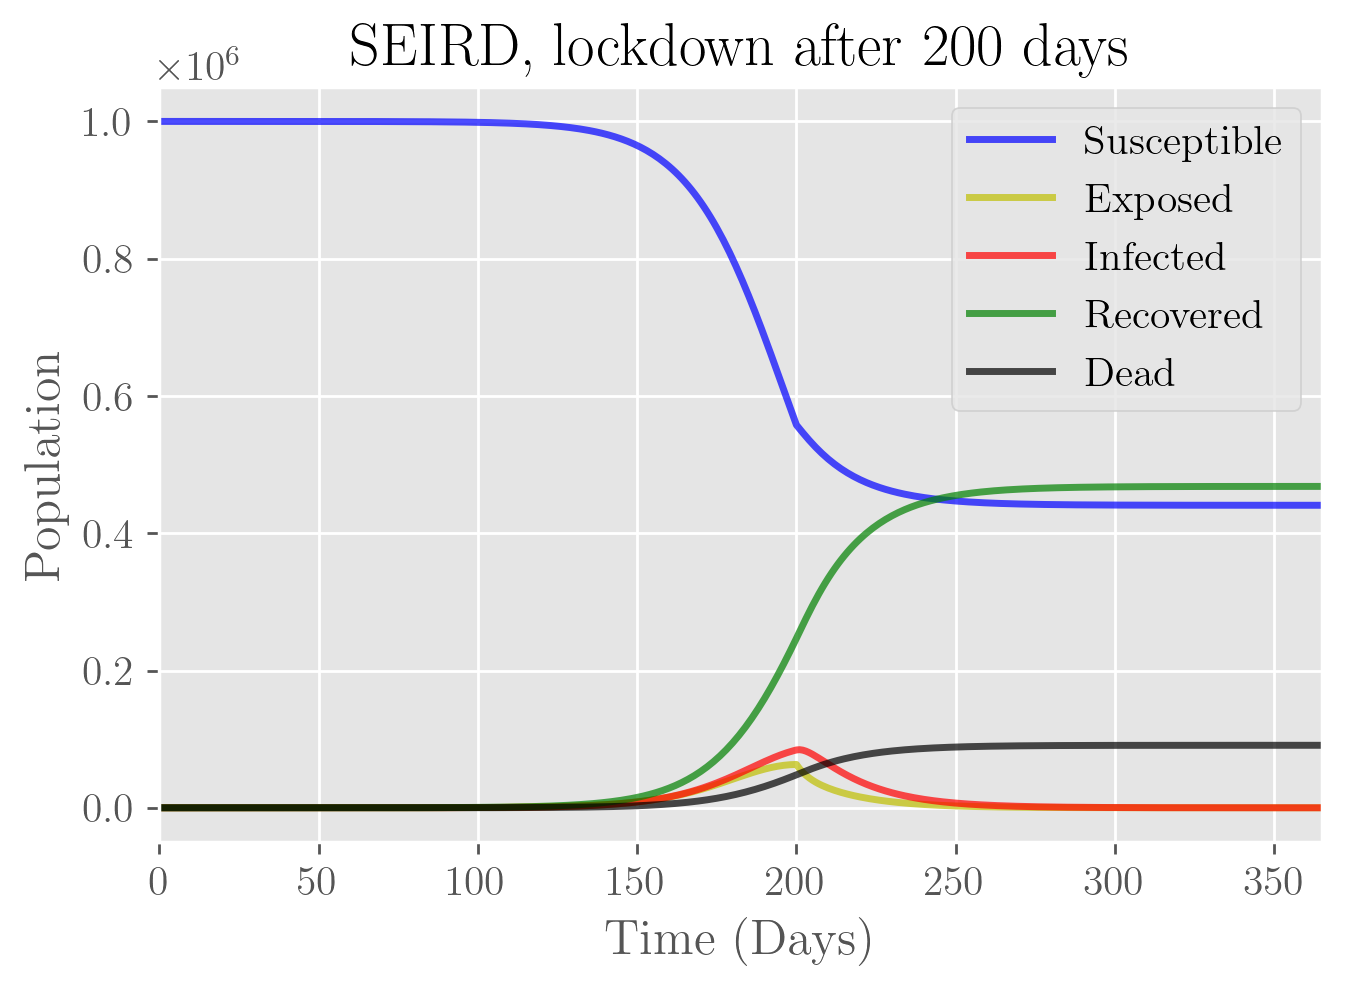

In [17]:
plt.style.use('ggplot')
plt.rcParams['figure.dpi']= 250
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif',weight = 'bold', size =12 )

f, ax = plt.subplots()
ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
plt.legend(loc='best')

plt.xlabel('Time (Days)')
plt.xlim([0, 365])

plt.ylabel('Population')

plt.title("SEIRD, lockdown after {} days".format(L))
plt.draw()
plt.savefig('SEIRDPlot-lockdown.png', dpi=300)
plt.show()
